In [1]:
# https://www.kaggle.com/poonaml/analyzing-3-million-github-repos-using-bigquery/notebook

In [2]:
!pip install -e git+https://github.com/SohierDane/BigQuery_Helper#egg=bq_helper

[sudo] password for harshal: 


In [1]:
import bq_helper
import pandas as pd

In [2]:
#set GOOGLE_APPLICATION_CREDENTIALS="C:\Users\alakamale\Github\CA675-ede38ecf6679.json"
import os
from google.cloud.bigquery.client import Client

os.environ['GOOGLE_APPLICATION_CREDENTIALS']='CA675-ede38ecf6679.json'
bq_client = Client()

In [3]:
github_repos = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                       dataset_name = "github_repos")

### Listing Tables

In [4]:
# print a list of all the tables in the github_repos dataset
github_repos.list_tables()

['commits',
 'contents',
 'files',
 'languages',
 'licenses',
 'sample_commits',
 'sample_contents',
 'sample_files',
 'sample_repos']

In [8]:
# print information on all the columns in the "commits" table
# in the github_repos dataset
github_repos.table_schema("commits")

,name,type,mode,description
0,commit,STRING,NULLABLE,None
1,tree,STRING,NULLABLE,None
2,parent,STRING,REPEATED,None
3,author,RECORD,NULLABLE,None
4,author.name,STRING,NULLABLE,None
5,author.email,STRING,NULLABLE,None
6,author.time_sec,INTEGER,NULLABLE,None
7,author.tz_offset,INTEGER,NULLABLE,None
8,author.date,RECORD,NULLABLE,None
9,author.date.seconds,INTEGER,NULLABLE,None


In [8]:
# preview the first couple lines of the "commits" table
github_repos.head("commits")

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,ad02cc045016044349348a6ff994df10b819e7bb,397490f7d02fb37734276d77eb72952bc1e9e2de,[d42a354b58a9684296056184300a8415924c32a0],"{'name': 'Nicolas Albert', 'email': '1b2dd0bac...","{'name': 'Nicolas Albert', 'email': '1b2dd0bac...",Close #4115 - Upgrade to Java 1.7.0_55 and Tom...,Close #4115 - Upgrade to Java 1.7.0_55 and Tom...,"[{'key': 'Former-commit-id', 'value': '0b64dbc...",[],None,[convertigo/convertigo-webapp],None
1,b41d75048f7f458a71a4540d8f6a407787034b9d,35d4f735790c7ef7f059e8a7879f3c93ddadc3a6,[bcbdc591bebaf842fb0d743d5bb032e054b9de04],"{'name': 'hp.com!davidm', 'email': 'hp.com!dav...","{'name': 'hp.com!davidm', 'email': 'hp.com!dav...",Fix double-negation in unw_get_save_loc(). Re...,Fix double-negation in unw_get_save_loc(). Re...,"[{'key': 'BKrev', 'value': '3f8755d6q9mbCMOMPX...",[],None,"[SyndicateRogue/libunwind, krytarowski/libunwi...",None
2,246f2690ef3287ff98cbb87565c521060a19e2df,2fe532f9ae73a643d370b712b8dc05cc1ad52cbf,"[f51995bfb2e6090520e01f516bbb68e3fb6025b1, 5d3...","{'name': 'Luke Dashjr', 'email': 'd0b35c280567...","{'name': 'Luke Dashjr', 'email': 'd0b35c280567...",Tree-Merge commit '5d3faba' into cg_merges_201...,Tree-Merge commit '5d3faba' into cg_merges_201...,"[{'key': 'Conflicts', 'value': '', 'email': No...",[],None,"[leonschoorl/bfgminer-bench, aiwis30/my, Crypt...",None
3,c1781455dde3816a1df8fbe2675cd395f7ca2ea5,fd2ce85ca7247a04db9fdc2a56df0448c8aa591c,[03f3bec6b3cfa7bc3fe475439c1f2e31a480c6e3],"{'name': 'juhosg', 'email': '0b85b0feb94c9a44e...","{'name': 'juhosg', 'email': '0b85b0feb94c9a44e...",packages/uanytun: fix whitespaces,packages/uanytun: fix whitespaces\n\nSigned-of...,"[{'key': 'Signed-off-by', 'value': 'Dirk Neuki...",[],None,"[cuiqingwei1981/openwrt, maxrio/openwrt]",None
4,62892b17afb22ec7f291091b346c0f3412c1281a,f170ece3e1fbb566c902f17ef6509ed1da23f47a,[c7e5324c4450e5b7be6f869baf0b24c3d808dcdc],"{'name': 'Matt Rajkowski', 'email': 'd1a81dd63...","{'name': 'Matt Rajkowski', 'email': 'd1a81dd63...",CHANGE: Facebook likes enabled even when faceb...,CHANGE: Facebook likes enabled even when faceb...,"[{'key': 'FIX', 'value': 'updateCommentsCount ...",[],None,[Concursive/concourseconnect-community],None


In [10]:
query1= """SELECT repo_name, 
            FROM `bigquery-public-data.github_repos.commits`
            WHERE 
            LIMIT 5000
        """
github_repos.estimate_query_size(query1)

19.73382367193699

In [12]:
github_repo_commits = github_repos.query_to_pandas_safe(query1, max_gb_scanned=20)
github_repo_commits.head()

,author
0,"{'name': 'Joshua Brindle', 'email': '5b58b2021..."
1,"{'name': 'elmar', 'email': '791f3a257265e3fe39..."
2,"{'name': 'grosbach', 'email': '01cbceb5bfe9a58..."
3,"{'name': 'Joshua Brindle', 'email': '5b58b2021..."
4,"{'name': 'stoklund', 'email': '9e01571d0adae2c..."


In [14]:
github_repo_commits['author'][0]

{'name': 'Joshua Brindle',
 'email': '5b58b20213d5f8d163008d4735e8bcc25bddb250@tresys.com',
 'time_sec': 1098710116,
 'tz_offset': 0,
 'date': {'seconds': 1098710116, 'nanos': None}}

##### SELECT ... FROM ... WHERE

Or first query is going to be simple select a single column from a specific table. To do this, you need to tell SELECT which column to select and then specify what table that column is from using FROM.

When you're working with BigQuery datasets, you're almost always going to want to return only certain rows, usually based on the value of a different column. You can do this using the WHERE clause, which will only return the rows where the WHERE clause evaluates to true.
What are sizes of Github Repositories??

We will be using contents table.

In [9]:
github_repos.head("contents")

,id,size,content,binary,copies
0,78fdf3c2712951cae81e16bfefc5cf534889c2e1,4588,"{:all-words (""Zur"" ""Verbesserung"" ""des"" ""Straf...",False,1
1,4e3412478ee8bfcc8f5f4e3501049c5cb20809c2,749,//\n// LXModuleViewControllerDelegate.swift\n...,False,1
2,8e92ef4792b8d74cc16ba18a777a4b0ed0d94f07,254,#!/bin/bash\n\n# Google Chrome (beta)\n\nsudo ...,False,1
3,259a65b9aba37fbcc9a4a2eb5231923123d615be,39993,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 T...",False,1
4,202103c1d85c668d402f6208a1428fbfd8dd8974,623,"﻿<?xml version=""1.0"" encoding=""utf-8""?>\n<pack...",False,2


#### Checking the size of our query before we run it

Our Dataset is 3TBs so we can easily cross tha daily limit by running few queries. We should always estimate how much data we need to scan for executing this query by BigQueryHelper.estimate_query_size() method.


In [8]:
query1= """SELECT size
            FROM `bigquery-public-data.github_repos.contents`
            WHERE binary = True
            LIMIT 5000
        """
github_repos.estimate_query_size(query1)

2.167315425351262

#### Running a query

There are 2 ways to do this:

    BigQueryHelper.query_to_pandas(query): This method takes a query and returns a Pandas dataframe.
    BigQueryHelper.query_to_pandas_safe(query, max_gb_scanned=1): This method takes a query and returns a Pandas dataframe only if the size of the query is less than the upperSizeLimit (1 gigabyte by default).

Here's an example of a query that is larger than the specified upper limit.

In [9]:
github_repo_sizes = github_repos.query_to_pandas_safe(query1, max_gb_scanned=2.34)
github_repo_sizes.head()

,size
0,36471
1,24746
2,1021326
3,2508
4,3873


In [10]:
BYTES_PER_MB = 2**20
print("Minimum git repo size is " , github_repo_sizes.min()/BYTES_PER_MB, " bytes")
print("Maximum git repo size is " , github_repo_sizes.max()/BYTES_PER_MB, " bytes");

Minimum git repo size is  size    0.000011
dtype: float64  bytes
Maximum git repo size is  size    43.265584
dtype: float64  bytes


In [11]:
import matplotlib.pyplot as plt

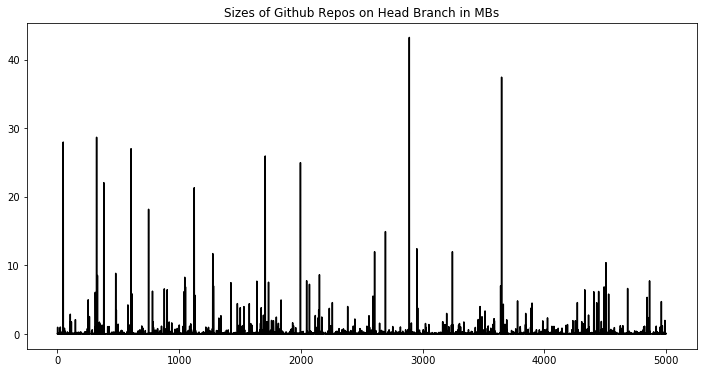

In [46]:
data1 = github_repo_sizes.divide(BYTES_PER_MB)
plt.figure(figsize=(12,6))
plt.plot(data1,color="black")
##plt.savefig('github-sizes-on-head-branch.png')
plt.title("Sizes of Github Repos on Head Branch in MBs");
data1.to_csv('repo_sizes.csv')

In [20]:
type(data1.index)

pandas.core.indexes.range.RangeIndex

In [13]:
import pandas as pd
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import plotly.graph_objs as go

In [ ]:
data = go.Scatter(x=data1.index,
                 y=data1['size'],
             mode = 'lines+markers',
             #marker = dict(symbol = 17, size = 10)
             #hoverinfosrc= 'Average amount spent in U.S. dollars'
                  )

layout1 = go.Layout(
    title = 'Sizes of Github Repos on Head Branch in MBs', titlefont = dict(size = 30, color='#177a21'),
    xaxis = dict(
            title = 'Index',
            #titlefont = dict(size=15)
                ),
    yaxis = dict(
            title = "Size",
            #titlefont = dict(size=15
    ),

                )
fig = go.Figure(data=[data], layout=layout1)
iplot(fig)

#### How many github repositories are in form of binary files?

A binary file is a file stored in binary format. A binary file is computer-readable but not human-readable. All executable programs are stored in binary files, as are most numeric data files.


In [25]:
%%time
query2= """SELECT binary
            FROM `bigquery-public-data.github_repos.contents`
            LIMIT 50000
        """

binary_files=github_repos.query_to_pandas_safe(query2)

CPU times: user 495 ms, sys: 35.7 ms, total: 530 ms
Wall time: 4.13 s


In [38]:
import seaborn as sns

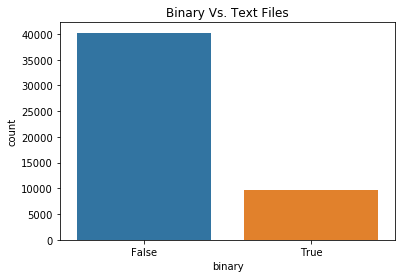

In [47]:
binary_files.head()
sns.countplot(binary_files.binary)
plt.savefig('github-binary-files.png')
plt.title("Binary Vs. Text Files");
binary_files.to_csv('binary_files.csv')

In [26]:
binary_files.head()

,binary
0,False
1,False
2,False
3,False
4,False


In [ ]:
data = go.Bar(x=binary_files['binary'],
                 y=binary_files.index,
             #mode = 'lines+markers',
             #marker = dict(symbol = 17, size = 10)
             #hoverinfosrc= 'Average amount spent in U.S. dollars'
                  )

layout1 = go.Layout(
    title = 'Binary Vs Text files', titlefont = dict(size = 30, color='#177a21'),
    xaxis = dict(
            title = 'Index',
            #titlefont = dict(size=15)
                ),
    yaxis = dict(
            title = 'Binary',
            #titlefont = dict(size=15
    ),
    barmode="group"
                )
fig = go.Figure(data=[data], layout=layout1)
iplot(fig)

#Looks like approximately 5% of the total files is dataset are binary files i.e executables rest all are normal text files.

### Which are the Popular Languages in Github?

In [48]:
github_repos.head("languages")

,repo_name,language
0,JoaoPedroToledo/C,"[{'name': 'C', 'bytes': 4919}]"
1,brantr/grid-fft,"[{'name': 'C', 'bytes': 100796}]"
2,plkid/demo,"[{'name': 'C', 'bytes': 33}]"
3,digitalmediacenter/zabbix_dns,"[{'name': 'C', 'bytes': 7092}]"
4,AlbandeCrevoisier/trajectoryctc,"[{'name': 'C', 'bytes': 4255}]"


In [49]:
#%%time
query3= """SELECT language
            FROM `bigquery-public-data.github_repos.languages`
            LIMIT 5000
        """
github_repos.estimate_query_size(query3)

0.11384124588221312

In [50]:
github_languages = github_repos.query_to_pandas_safe(query3)
github_languages.head()

,language
0,"[{'name': 'C', 'bytes': 4919}]"
1,"[{'name': 'C', 'bytes': 100796}]"
2,"[{'name': 'C', 'bytes': 33}]"
3,"[{'name': 'C', 'bytes': 7092}]"
4,"[{'name': 'C', 'bytes': 4255}]"


In [51]:
github_languages.language[0]
languagesList=[]
for lang in github_languages.language:
    languagesList.extend(lang)
languagesList[:5]

[{'name': 'C', 'bytes': 4919},
 {'name': 'C', 'bytes': 100796},
 {'name': 'C', 'bytes': 33},
 {'name': 'C', 'bytes': 7092},
 {'name': 'C', 'bytes': 4255}]

In [52]:
Languages_count={}
for lang in languagesList:
    if lang["name"] not in Languages_count:
        Languages_count[lang["name"]]=0
    Languages_count[lang["name"]]+=1
#Languages_count

In [53]:
import operator
sorted_Languages_counts = sorted(Languages_count.items(), key=operator.itemgetter(1),reverse=True)
sorted_Languages_counts[:15]


[('C', 5000),
 ('C#', 1176),
 ('C++', 997),
 ('Shell', 976),
 ('Makefile', 797),
 ('Python', 646),
 ('JavaScript', 482),
 ('Objective-C', 481),
 ('Java', 436),
 ('Go', 417),
 ('HTML', 393),
 ('M4', 317),
 ('Perl', 253),
 ('CSS', 219),
 ('Ruby', 208)]

In [60]:
import json
with open('sorted_Languages_counts.json', 'w') as fp:
    json.dump(sorted_Languages_counts, fp)


In [36]:
import numpy as np

Text(0.5, 1.0, 'Language Popularity Score')

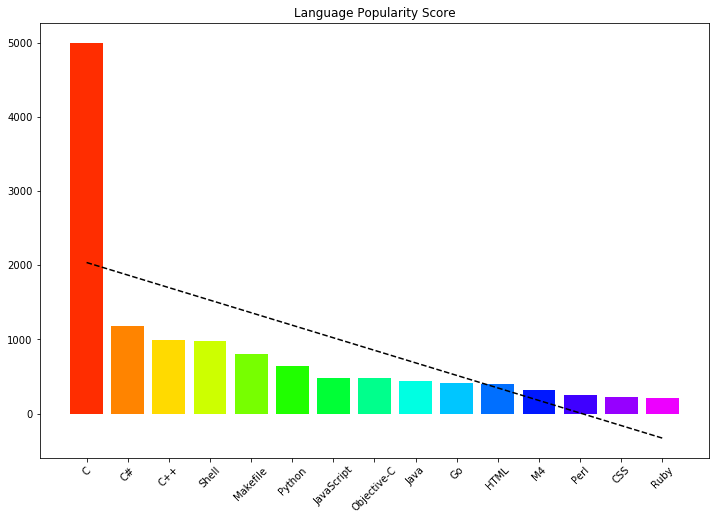

In [54]:
language = list(zip(*sorted_Languages_counts[:15]))[0]
count = list(zip(*sorted_Languages_counts[:15]))[1]
x_pos = np.arange(len(language))


# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, count, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(12,8))
plt.plot(x_pos, trendline, color='black', linestyle='--')    
plt.bar(x_pos, count,align='center',color=sns.color_palette("gist_rainbow",len(x_pos)))
plt.xticks(x_pos, language,rotation=45) 
plt.title('Language Popularity Score')
#plt.savefig('github-language-popularity.png');

In [83]:
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Which are the trending repositories on Github ??

In [61]:
github_repos.head("sample_repos")

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063


In [62]:
query9 ="""
        SELECT repo_name, watch_count
        FROM `bigquery-public-data.github_repos.sample_repos`
        ORDER BY watch_count DESC 
        LIMIT 2000
        """
github_repos.estimate_query_size(query9)

0.012228592298924923

In [63]:
github_repo_trending_repos = github_repos.query_to_pandas_safe(query9)
github_repo_trending_repos.head(15)

,repo_name,watch_count
0,FreeCodeCamp/FreeCodeCamp,90457
1,firehol/netdata,13208
2,joshbuchea/HEAD,13125
3,braydie/HowToBeAProgrammer,12019
4,sindresorhus/awesome,11063
5,tensorflow/tensorflow,10728
6,facebook/react,10458
7,ParsePlatform/parse-server,10339
8,loverajoel/jstips,9585
9,facebook/react-native,9437


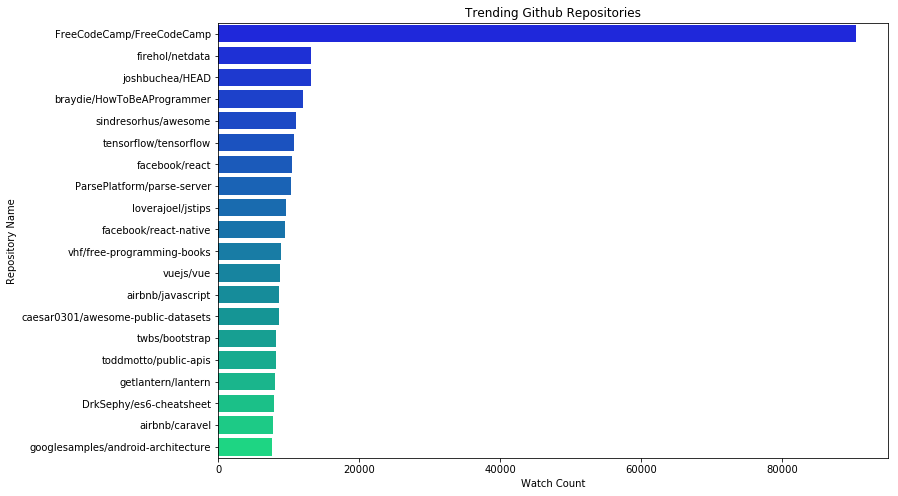

In [64]:
plt.figure(figsize=(12,8))
g = sns.barplot(y="repo_name", x="watch_count", data=github_repo_trending_repos[:20], palette="winter")
plt.title('Trending Github Repositories')
plt.ylabel("Repository Name")
plt.xlabel("Watch Count")
github_repo_trending_repos.to_csv('github_repo_trending_repos.csv')
#plt.savefig('github-trending-repo-by-watch-count.png');

### Who are the authors with Highest number of repositories?

The author on github is the person who originally wrote the code. In other words, the author is the person who originally wrote the patch.

In [65]:
%%time
query4= """SELECT author
            FROM `bigquery-public-data.github_repos.commits`
            LIMIT 500000
        """
github_repos.query_to_pandas_safe(query4)

Query cancelled; estimated size of 19.73382367193699 exceeds limit of 1 GB
CPU times: user 8.83 ms, sys: 0 ns, total: 8.83 ms
Wall time: 419 ms


### GROUP BY... HAVING and COUNT

Now we will be learning how to GROUP data BY particular column and COUNT common occurences. And also ORDER results BY count in ascending or DESCending order..
Which are popular licenses?

In [66]:
%%time
query8 ="""
        SELECT license, COUNT(*) AS count
        FROM `bigquery-public-data.github_repos.licenses`
        GROUP BY license
        ORDER BY COUNT(*) DESC
        """
github_repos.query_to_pandas_safe(query8)

CPU times: user 39.8 ms, sys: 762 µs, total: 40.5 ms
Wall time: 2.42 s


In [67]:
github_repo_licenses = github_repos.query_to_pandas_safe(query8)
github_repo_licenses.head()

,license,count
0,mit,1709794
1,apache-2.0,493527
2,gpl-2.0,345460
3,gpl-3.0,343487
4,bsd-3-clause,152969


In [68]:
github_repo_licenses.shape

(15, 2)

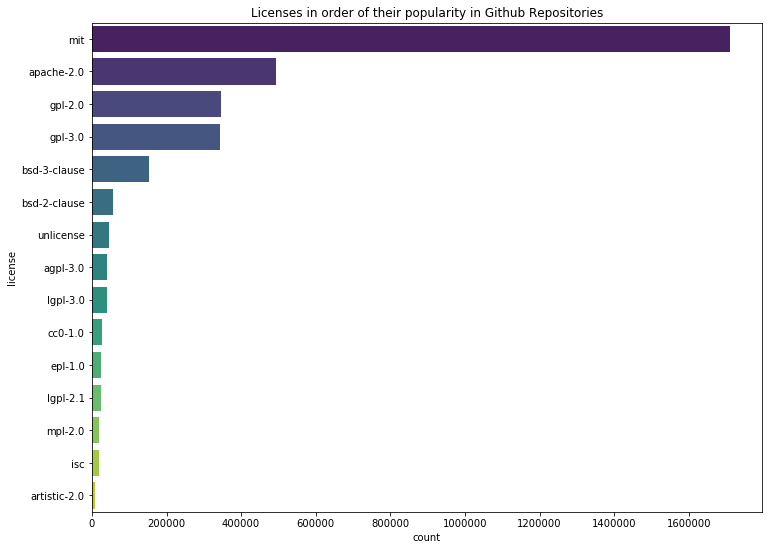

In [69]:
plt.figure(figsize=(12,9))
sns.barplot(y="license", x="count", data=github_repo_licenses, palette="viridis")
plt.title('Licenses in order of their popularity in Github Repositories')
github_repo_licenses.to_csv('github_repo_licenses.csv')
#plt.savefig('github-licenses-popularity.png');

### JOIN

Till now we were using only single table. To get broader view of real life scenario where we have to use JOIN to join 2 tables together based on some column.
How many files are covered by each license?

In [70]:
query10 = ("""
        -- Select all the columns we want in our joined table
        SELECT L.license, COUNT(sf.path) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` as sf
        -- Table to merge into sample_files
        INNER JOIN `bigquery-public-data.github_repos.licenses` as L 
            ON sf.repo_name = L.repo_name -- what columns should we join on?
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """)

file_count_by_license = github_repos.query_to_pandas_safe(query10, max_gb_scanned=6)

In [72]:
file_count_by_license.head()

,license,number_of_files
0,mit,20615291
1,gpl-2.0,17132457
2,apache-2.0,7254869
3,gpl-3.0,4971469
4,bsd-3-clause,2713916


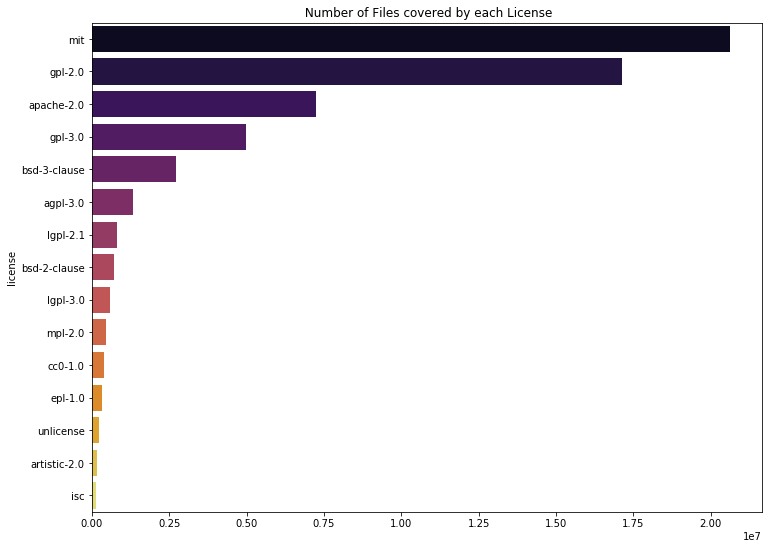

In [73]:
plt.figure(figsize=(12,9))
g = sns.barplot(y="license", x="number_of_files", data=file_count_by_license, palette="inferno")
plt.title(' Number of Files covered by each License')
file_count_by_license.to_csv('file_count_by_license.csv')
#plt.savefig('num-of-files-by-license.png')
plt.xlabel("");

### How many commits have been made in repos written in the Python programming language?

In [74]:
query11 = """
WITH python_repos AS (
    SELECT DISTINCT repo_name -- Notice DISTINCT
    FROM `bigquery-public-data.github_repos.sample_files`
    WHERE path LIKE '%.py')
SELECT commits.repo_name, COUNT(commit) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits` AS commits
JOIN python_repos
    ON  python_repos.repo_name = commits.repo_name
GROUP BY commits.repo_name
ORDER BY num_commits DESC
"""
github_repo_num_commits_distinct = github_repos.query_to_pandas_safe(query11, max_gb_scanned=10)
github_repo_num_commits_distinct

,repo_name,num_commits
0,torvalds/linux,602604
1,apple/swift,38891
2,Microsoft/vscode,6909
3,facebook/react,6875
4,tensorflow/tensorflow,5253


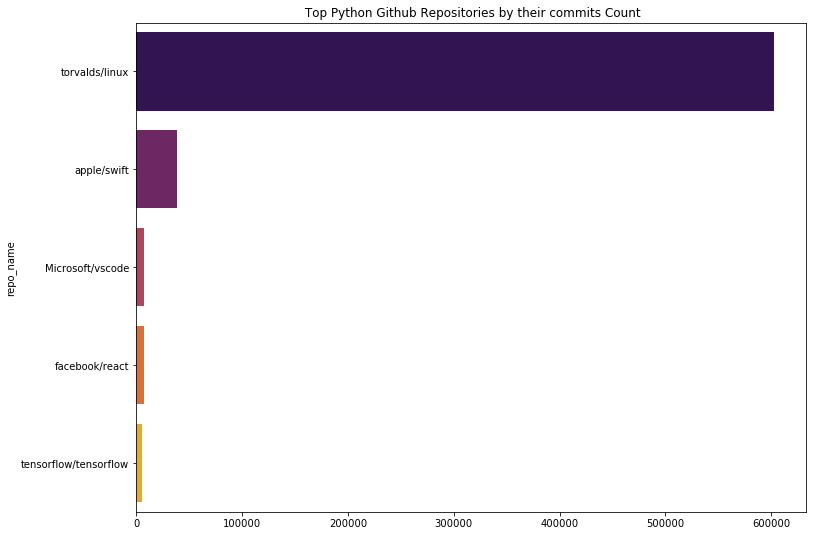

In [76]:
plt.figure(figsize=(12,9))
g = sns.barplot(y="repo_name", x="num_commits", data=github_repo_num_commits_distinct[:15], palette="inferno")
plt.title(' Top Python Github Repositories by their commits Count')
github_repo_num_commits_distinct.to_csv('github_repo_num_commits_distinct.csv')
#plt.savefig('python-by-commits.png')
plt.xlabel("");

### Number of Python files in each repositories above

In [77]:
query12 = """
SELECT repo_name, COUNT(path) AS num_python_files
FROM `bigquery-public-data.github_repos.sample_files`
WHERE repo_name IN ('torvalds/linux', 'apple/swift', 'Microsoft/vscode', 'facebook/react', 'tensorflow/tensorflow')
    AND path LIKE '%.py'
GROUP BY repo_name
ORDER BY num_python_files DESC
"""

github_repo_num_python_files = github_repos.query_to_pandas_safe(query12, max_gb_scanned=10)
github_repo_num_python_files

,repo_name,num_python_files
0,tensorflow/tensorflow,786
1,apple/swift,104
2,torvalds/linux,39
3,facebook/react,2
4,Microsoft/vscode,1


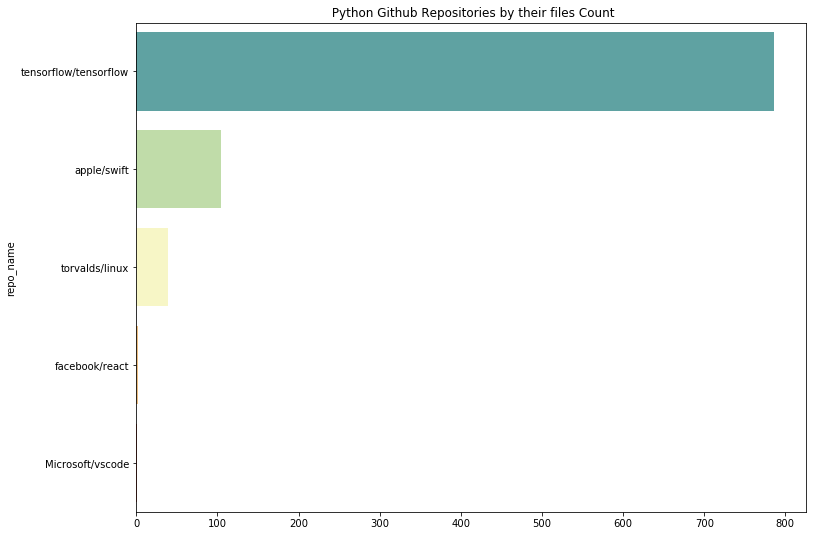

In [78]:
plt.figure(figsize=(12,9))
g = sns.barplot(y="repo_name", x="num_python_files", data=github_repo_num_python_files, palette="Spectral_r")
plt.title(' Python Github Repositories by their files Count')
github_repo_num_python_files.to_csv('github_repo_num_python_files.csv')
#plt.savefig('python-by-files-.png')
plt.xlabel("");

#### How many commits have been made in repos written in the Java programming language?

In [79]:
query13 = """
WITH java_repos AS (
    SELECT DISTINCT repo_name -- Notice DISTINCT
    FROM `bigquery-public-data.github_repos.sample_files`
    WHERE path LIKE '%.java')
SELECT commits.repo_name, COUNT(commit) AS num_commits
FROM `bigquery-public-data.github_repos.sample_commits` AS commits
JOIN java_repos
    ON  java_repos.repo_name = commits.repo_name
GROUP BY commits.repo_name
ORDER BY num_commits DESC
"""
github_repo_num_java_distinct = github_repos.query_to_pandas_safe(query13, max_gb_scanned=5.3)
github_repo_num_java_distinct

,repo_name,num_commits
0,Microsoft/vscode,6909
1,tensorflow/tensorflow,5253


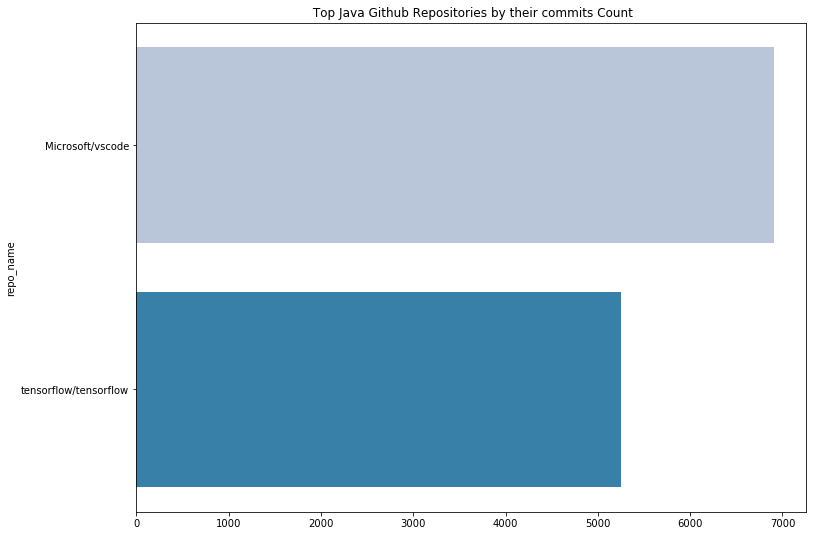

In [80]:
plt.figure(figsize=(12,9))
g = sns.barplot(y="repo_name", x="num_commits", data=github_repo_num_java_distinct, palette="PuBu")
plt.title(' Top Java Github Repositories by their commits Count')
github_repo_num_java_distinct.to_csv('github_repo_num_java_distinct.csv')
#plt.savefig('java-by_commits.png')
plt.xlabel("");

### How many times 'This should never happen' appears??

In [81]:
query14 ="""
SELECT
  SUM(copies)
FROM
  `bigquery-public-data.github_repos.sample_contents`
WHERE
  NOT binary
  AND content like '%This should never happen%'
LIMIT 500
"""
github_repos.estimate_query_size(query14)

23.62852669414133

In [82]:
this_should_never_happen_count=github_repos.query_to_pandas_safe(query14, max_gb_scanned=23.7)
this_should_never_happen_count

,f0_
0,68486


### How many GO files are there?

In [46]:
query15="""
SELECT COUNT(*)
FROM `bigquery-public-data.github_repos.sample_files`
WHERE path LIKE '%.go'
LIMIT 500
"""
github_repos.estimate_query_size(query15)

3.645207361318171

In [47]:
go_files_count=github_repos.query_to_pandas_safe(query15, max_gb_scanned=3.7)
go_files_count

,f0_
0,629226


### How many Python files are there?

In [48]:
query16="""
SELECT COUNT(*)
FROM `bigquery-public-data.github_repos.sample_files`
WHERE path LIKE '%.py'
LIMIT 500
"""
github_repos.estimate_query_size(query16)

3.645207361318171

In [49]:
python_files_count=github_repos.query_to_pandas_safe(query16, max_gb_scanned=3.7)
python_files_count

,f0_
0,1231972
